# MMA/GMMA/MMAI 869: Individual Assignment

Version 1: Updated September 27, 2021

<font color='red'>\# TODO: fill in the below</font>

- [Aaron, Sum]
- [20311142]
- [Session 1]
- [Who Moved My Cheese?]
- [1/1/2022]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [ ]:
import datetime
import pandas as pd
import numpy as np

import datetime



In [ ]:
print(datetime.datetime.now())

2022-01-11 03:16:13.919231


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.12


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
# TODO: install any packages you need to here. For example:
#pip install unidecode
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from scipy.spatial import distance

from matplotlib import dates
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,KFold,cross_val_score
from sklearn.feature_selection import RFECV, RFE

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [ ]:
#Check for missisng vals
df1.isna().any()


Age              False
Income           False
SpendingScore    False
Savings          False
dtype: bool

In [ ]:
df1.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


## 1.1: Clustering Algorithm #1

In [ ]:
#Scale Data
scl=StandardScaler()
df2=scl.fit_transform(df1)
pd.DataFrame(df2).describe()

,0,1,2,3
count,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02
mean,5.672031e-17,-2.638154e-17,-1.954432e-16,-4.058360e-16
std,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00
min,-1.742394e+00,-1.766355e+00,-1.947295e+00,-2.399206e+00
25%,-1.037472e+00,-1.139805e+00,-7.722011e-01,-1.018085e+00
50%,-8.211094e-04,-1.210579e-02,-5.276784e-01,4.747819e-01
75%,1.077295e+00,8.784513e-01,1.014725e+00,8.463867e-01
max,1.574888e+00,1.849048e+00,1.908103e+00,1.645835e+00


In [ ]:
#Running the kmeans algorithm (k ranging from 2 to 15)
#Using elbow as the metric
#Inertia and Sillhouette are the way we determine the optimal number of clsuters

cluster=[]
Inertia=[]
silscore=[]

x=df2

for k in range(2,15):
    kmeans=KMeans(n_clusters=k,n_init=25,random_state=42,max_iter=1000,init='k-means++')

    y_pred=kmeans.fit_predict(x)
    
    cluster.append(k)
    Inertia.append(kmeans.inertia_)
    
    silscore.append(silhouette_score(x,kmeans.labels_))

    
    print("\n"'Number of clusters:',k,"\n"'Clustering:',y_pred,"\n"'Inertia with',k,'Clusters:',kmeans.inertia_,"\n"
          'Silhouette_score with',k,'Clusters:',silhouette_score(x,kmeans.labels_),"\n"'Centroids:',kmeans.cluster_centers_) 
    


Number of clusters: 2 
Clustering: [0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0
 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1

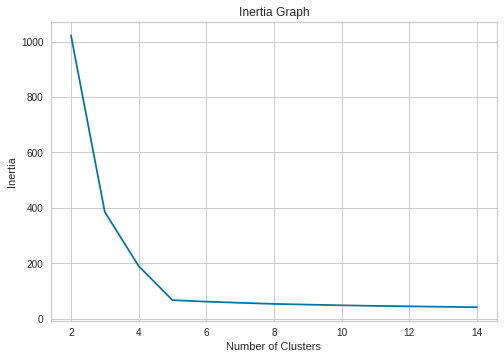

In [ ]:
plt.plot(cluster,Inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia Graph')
plt.show()

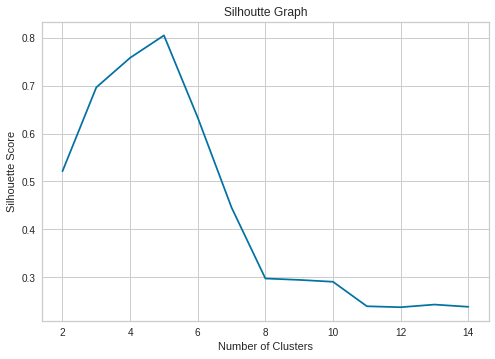

In [ ]:
plt.plot(cluster,silscore)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhoutte Graph')
plt.show()

Text(0, 0.5, 'SpendingScore')

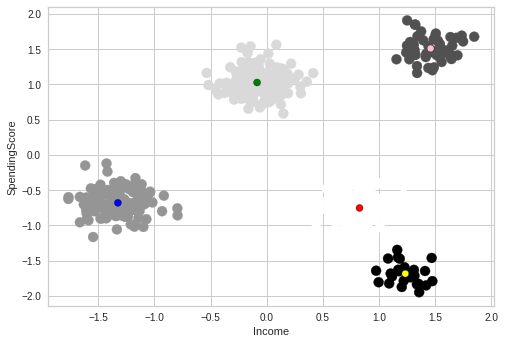

In [ ]:
#Elbow shows that inertia starts increasing rapidly after k=5
#Highest Silhouette is at k =5 
#Using K=5 Cluster
#Plotting the clusters 'Income' and 'Spending Score' [arbitary selection]

kmeans=KMeans(n_clusters=5,n_init=25,random_state=42,init='k-means++')

y_pred=kmeans.fit(x)

plt.figure;

plt.scatter(x[:,1], x[:,2], s=100, c=y_pred.labels_)

plt.scatter(
y_pred.cluster_centers_[:, 1], y_pred.cluster_centers_[:, 2],
color = ['red','green','blue','pink','yellow'],
edgecolor='black',
label='centroids'
)

plt.xlabel('Income')
plt.ylabel('SpendingScore')

In [ ]:
#Publishing the cluster centers
kmeans.cluster_centers_

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [ ]:
#Publishing # of costumers in each cluster
z_score=kmeans.fit_predict(x)
data3=pd.DataFrame(df2)
data3['cluster']=z_score
data3['cluster'].value_counts()

1    157
2    147
0    126
3     50
4     25
Name: cluster, dtype: int64

In [ ]:
# means of each K-Means cluster and its silhouette_score
alg = kmeans.labels_
a = df1.groupby(alg).count()[['Age']]/df1.shape[0]
a.columns = ['%']
b = df1.groupby(alg).mean()[['Age','Income','SpendingScore','Savings']]
c = b.join(a)
print(silhouette_score(x, kmeans.labels_))
c.sort_values(by='Age')

0.8048976287755765


,Age,Income,SpendingScore,Savings,%
3,24.180000,128029.120000,0.896892,4087.520309,0.099010
0,32.777778,105265.809524,0.309926,14962.778066,0.249505
1,59.955414,72448.063694,0.771518,6889.972190,0.310891
4,86.000000,119944.040000,0.068378,14808.683793,0.049505
2,87.775510,27866.102041,0.328800,16659.261445,0.291089


## 1.2: Clustering Algorithm #2

In [ ]:
def DBSCAN_parameter_tuning(eps_min,eps_max,eps_incre,min_sample, max_sample):
    '''
    input: takes in a range of eps and min_samples
    output: a dataframe with the following columns: metric, min_sample, eps, n_clusters, silhouettes
    '''
    output_silhouettes = []
    output_n_clusters = []
    output_eps = []
    output_min_sample = []
    output_metric = []
    
    epss = np.arange(eps_min, eps_max + eps_incre, eps_incre)
    min_samples = np.arange(min_sample, max_sample + 1, 1)
    metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
    
    for metric in metrics:
        for eps in epss:
            for min_sample in min_samples:
                db = DBSCAN(eps=eps, min_samples=min_sample,metric=metric).fit(x)
                number_of_clusters = len(set(db.labels_))
                if number_of_clusters == 1:
                    continue
                else:
                    output_silhouettes.append(silhouette_score(x, db.labels_,metric=metric))
                    output_n_clusters.append(number_of_clusters)
                    output_eps.append(eps)
                    output_min_sample.append(min_sample)
                    output_metric.append(metric)
    
    return pd.DataFrame({'metric':output_metric,'min_sample':output_min_sample,'eps':output_eps,'n_clusters':output_n_clusters,'silhouettes':output_silhouettes})

In [ ]:
# eps ranged from 0.1 to 1.0 (in 0.1 steps) and min_samples ranged from 2 to 8 are experienmented
df_DBSCAN_result = DBSCAN_parameter_tuning(0.1,1,0.1,2,8)
df_DBSCAN_result.sort_values(by='silhouettes',ascending = False).head(15)

,metric,min_sample,eps,n_clusters,silhouettes
67,cosine,5,0.1,4,0.921631
65,cosine,3,0.1,4,0.921631
75,cosine,6,0.2,4,0.921631
76,cosine,7,0.2,4,0.921631
77,cosine,8,0.2,4,0.921631
72,cosine,3,0.2,4,0.921631
71,cosine,2,0.2,4,0.921631
70,cosine,8,0.1,4,0.921631
69,cosine,7,0.1,4,0.921631
68,cosine,6,0.1,4,0.921631


In [ ]:
#Above shows that silhouette score doesnt improve past 4 min_samples and 0.1 eps, using that to keep things simple
db = DBSCAN(eps=0.1, min_samples=4,metric='cosine')
db.fit(x)
df1['DBSCAN Clusters'] = db.labels_
df1.head()

,Age,Income,SpendingScore,Savings,DBSCAN Clusters
0,58,77769,0.791329,6559.829923,0
1,59,81799,0.791082,5417.661426,0
2,62,74751,0.702657,9258.992965,0
3,59,74373,0.765680,7346.334504,0
4,87,17760,0.348778,16869.507130,1


In [ ]:
# means of each DB-scan cluster and its silhouette_score
alg = 'DBSCAN Clusters'
a = df1.groupby(alg).count()[['Age']]/df1.shape[0]
a.columns = ['%']
b = df1.groupby(alg).mean()[['Age','Income','SpendingScore','Savings']]
c = b.join(a)
print(silhouette_score(x, db.labels_,metric='cosine'))
c.sort_values(by='Age')

0.9216306703857284


,Age,Income,SpendingScore,Savings,%
DBSCAN Clusters,,,,,
3,32.777778,105265.809524,0.309926,14962.778066,0.249505
0,51.314010,85873.439614,0.801802,6213.051446,0.409901
2,86.000000,119944.040000,0.068378,14808.683793,0.049505
1,87.775510,27866.102041,0.328800,16659.261445,0.291089


## 1.3 Model Comparison

Comparing K-Means to DB-scan-


K-means Silhouette score : 0.805

DB-Scan Silhouette score : 0.922

Based on these information, I believe DB-Scan is more optimal to be used. On top of higher a higher Silhouette score, It also has lower number of clusters which makes it more intepretable and easier to work with in a business standpoint


## 1.4 Personas

DB Cluster 0 : Age 51 | Income 86k | Spending score - 0.80 | 40% of Cluster = Are to be called the Mid Age Spenthrifts

DB Cluster 1 : Age 88 | Income 28k | Spending score - 0.33 | 29% of Cluster = Are to be called thhe Average Retired

DB Cluster 2 : Age 86 | Income of 120k | Spending Score - 0.06 | 5% of Cluster = Are to be called the Stingy Retired

DB Cluster 3 : Age 33 | Income of 105k | Spending Score - 0.31 | 25% of Cluster = Are to be called the Average Youngers

---




# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

Rule : High support & High Confidence


Example : People who buy Pasta, also buy Pasta Sauce


Interesting? : No


Explanation : There is a large percentage of people's transactions which contain Pasta&Pasta Sauce. 

Likewise, Pasta appers frequents on transactions with contain Pasta Sauce, and vice verca. This rule is not interesting because this is intuitive to Uncle Steve and this highly occuring pair doesnt seem odd.

## 2.2: A rule that might have reasonably high support but low confidence.

Rule : High support & Low Confidence

Example : People who buy rice also buy eggs

Interesting? : Yes


Explanation : There is a large percentage of people which contain the transaction of rice and eggs, but people who buy eggs dont appear as often on transactions with rice. This is interesting because perhaps moving the grains section nearer to the Eggs might be able to increase the confidence of these two items;increasing sales

## 2.3: A rule that might have low support and low confidence.

Rule : Low support & Low Confidence

Example : People who buy corn also buy Band-Aids

Interesting? : No


Explanation : In the few transactions that contain wine & band-aids, we have discerned that Band-Aids does not appear frequently in transactions that contain corn.

This is not interesting to Uncle Steve because is intuitive and dont seem to be related.

## 2.4: A rule that might have low support and high confidence.

Rule : Low support & High Confidence

Example : People who buy Vodka also buy Truffles

Interesting? : Yes!

Explanation : In the few transactions that contain Vodka and Truffles, we have discerned that Truffles appear frequenty in transactions that contain Vodka. This rule would make Uncle Steve excited for it is unintuitive and uncommon. Perhaps its a good combination in cooking that he would try in his next recipe? If it works out, perhaps it might be a good idea to put the two items near each other to drive sales higher!

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [ ]:
#Check for missing values
df3.isna().any()

UserID               False
Sex                  False
PreviousDefault      False
FirstName            False
LastName             False
NumberPets           False
PreviousAccounts     False
ResidenceDuration    False
Street               False
LicensePlate         False
BadCredit            False
Amount               False
Married              False
Duration             False
City                 False
Purpose              False
DateOfBirth          False
dtype: bool

In [ ]:
#Dropping columns that dont make sense for prediction
X_train = X_train.set_index('UserID')
Base_Train =X_train.drop(['FirstName','LastName','LicensePlate'], axis = 1)
#FirstName
#LastName
#LicensePlate

#Dropping columns that we dont want to deal with yet
Base_Train = Base_Train.drop(['Street','DateOfBirth'],axis=1)
Base_Train.head()

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose
UserID,,,,,,,,,,
236-22-6766,M,0,2,0,2,3329,0,12,New Roberttown,Household
766-20-5986,F,0,0,2,2,2996,0,36,Ericmouth,Household
744-25-5747,F,0,2,0,3,2470,0,24,East Jill,NewCar
463-78-3098,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar
414-44-6527,M,0,0,1,3,3549,0,36,North Judithbury,Vacation


In [ ]:
#Encode stuff that need encoding
Base_Train = pd.get_dummies(Base_Train)

In [ ]:
Base_Train

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_F,Sex_M,City_Cassandraton,City_East Jessetown,City_East Jill,City_Ericmouth,City_Herrerafurt,City_Jacquelineland,City_Lake Chad,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Jessica,City_New Kellystad,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Port Jesseville,City_Port Keith,City_Ramirezstad,City_Robinsonshire,City_West Michael,Purpose_Business,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
236-22-6766,0,2,0,2,3329,0,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
766-20-5986,0,0,2,2,2996,0,36,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
744-25-5747,0,2,0,3,2470,0,24,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
463-78-3098,0,2,1,2,3745,0,30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
414-44-6527,0,0,1,3,3549,0,36,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888-92-1021,0,0,1,1,3607,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
875-64-1301,0,2,1,0,3186,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
584-74-0175,0,2,1,3,2387,1,36,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## 3.1: Baseline model

In [ ]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.
rf_clf = RandomForestClassifier(random_state=42)
score = cross_val_score(rf_clf,
                         Base_Train, y_train,
                         scoring="f1_micro", cv=6)
print(f"Random Forest model's average f1: {score.mean():.4f}")


Random Forest model's average f1: 0.8333


## 3.2: Feature engineering

In [ ]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.
X_train

,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
UserID,,,,,,,,,,,,,,,
236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22
766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19
744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17
463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16
414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888-92-1021,F,0,Carly,Tanner,0,1,1,99179 Erin Stravenue,98G XY9,3607,1,24,Robinsonshire,NewCar,1973-01-04
875-64-1301,F,0,Jasmine,Chambers,2,1,0,368 Jackson Pass Suite 887,430M,3186,0,30,North Judithbury,NewCar,1973-12-25
584-74-0175,F,0,Danielle,Hendrix,2,1,3,898 Kayla Manor Apt. 879,293 MHY,2387,1,36,Lake Roberto,Business,1969-02-25


In [ ]:
#Dropping columns that dont make sense for prediction
X_train =X_train.drop(['FirstName','LastName','LicensePlate'], axis = 1)
#FirstName
#LastName
#LicensePlate

In [ ]:
#Convert Address into just Streets
pat = r'^(?P<House_Number>\d+)?(?P<Street_Extract>.+(?=\bApt|\Suite)|.+(?=#)|.+)(?P<Apt_Suite_unit>(?:\bApt. |\bSuite|#).+)?'
df2 = X_train.Street.str.extract(pat)
X_train['Street']=df2['Street_Extract']
X_train

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Street,Amount,Married,Duration,City,Purpose,DateOfBirth
UserID,,,,,,,,,,,,
236-22-6766,M,0,2,0,2,Brown Wall,3329,0,12,New Roberttown,Household,1970-04-22
766-20-5986,F,0,0,2,2,Larson Causeway,2996,0,36,Ericmouth,Household,1964-06-19
744-25-5747,F,0,2,0,3,Michael Divide,2470,0,24,East Jill,NewCar,1975-02-17
463-78-3098,F,0,2,1,2,Williams Roads,3745,0,30,Lake Debra,UsedCar,1977-02-16
414-44-6527,M,0,0,1,3,Turner Rue,3549,0,36,North Judithbury,Vacation,1976-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...
888-92-1021,F,0,0,1,1,Erin Stravenue,3607,1,24,Robinsonshire,NewCar,1973-01-04
875-64-1301,F,0,2,1,0,Jackson Pass,3186,0,30,North Judithbury,NewCar,1973-12-25
584-74-0175,F,0,2,1,3,Kayla Manor,2387,1,36,Lake Roberto,Business,1969-02-25


In [ ]:
#Converting DoB Into Age
def age(born):
    born = datetime.strptime(born, '%Y-%m-%d').date()
    today = datetime.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
    
X_train['Age'] = X_train['DateOfBirth'].apply(age)
X_train = X_train.drop(['DateOfBirth'],axis=1)
X_train

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Street,Amount,Married,Duration,City,Purpose,Age
UserID,,,,,,,,,,,,
236-22-6766,M,0,2,0,2,Brown Wall,3329,0,12,New Roberttown,Household,51
766-20-5986,F,0,0,2,2,Larson Causeway,2996,0,36,Ericmouth,Household,57
744-25-5747,F,0,2,0,3,Michael Divide,2470,0,24,East Jill,NewCar,46
463-78-3098,F,0,2,1,2,Williams Roads,3745,0,30,Lake Debra,UsedCar,44
414-44-6527,M,0,0,1,3,Turner Rue,3549,0,36,North Judithbury,Vacation,45
...,...,...,...,...,...,...,...,...,...,...,...,...
888-92-1021,F,0,0,1,1,Erin Stravenue,3607,1,24,Robinsonshire,NewCar,49
875-64-1301,F,0,2,1,0,Jackson Pass,3186,0,30,North Judithbury,NewCar,48
584-74-0175,F,0,2,1,3,Kayla Manor,2387,1,36,Lake Roberto,Business,52


In [ ]:
#Dummy Encoding
X_train = pd.get_dummies(X_train)

In [ ]:
#Scaling
std_scaler = StandardScaler()
scaled_df = X_train.copy()

col = ['NumberPets','PreviousAccounts','ResidenceDuration','Amount','Duration','Age']
features = scaled_df[col]
features = std_scaler.fit_transform(features.values)
scaled_df[col] = features

In [ ]:
scaled_df

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Age,Sex_F,Sex_M,Street_ Aaron Avenue,Street_ Aaron Bypass,Street_ Aaron Cliffs,Street_ Aaron Creek,Street_ Aaron Drive,Street_ Aaron Fall,Street_ Aaron Lakes,Street_ Aaron Via,Street_ Abbott Corners,Street_ Abbott Station,Street_ Abigail Cape,Street_ Abigail Forges,Street_ Abigail Place,Street_ Acevedo Vista,Street_ Acosta Extensions,Street_ Acosta Island,Street_ Adam Brook,Street_ Adam Cliff,Street_ Adam Club,Street_ Adam Fall,Street_ Adam Plaza,Street_ Adam Port,Street_ Adam Skyway,Street_ Adam Turnpike,Street_ Adams Fields,Street_ Adams Heights,Street_ Adams Lake,Street_ Adams Park,Street_ Adams Parkway,Street_ Adams Springs,...,Street_ Zachary Isle,Street_ Zachary Mission,Street_ Zachary Trafficway,Street_ Zachary Valleys,Street_ Zachary Valleys,Street_ Zachary Village,Street_ Zamora Stream,Street_ Zimmerman Mews,Street_ Zimmerman Street,Street_ Zimmerman Village,Street_ Zuniga Locks,Street_ Zuniga Station,City_Cassandraton,City_East Jessetown,City_East Jill,City_Ericmouth,City_Herrerafurt,City_Jacquelineland,City_Lake Chad,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Jessica,City_New Kellystad,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Port Jesseville,City_Port Keith,City_Ramirezstad,City_Robinsonshire,City_West Michael,Purpose_Business,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
236-22-6766,0,1.198870,-0.995216,0.006558,-0.627068,0,-1.307621,0.559971,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
766-20-5986,0,-1.249886,0.984903,0.006558,-1.410231,0,1.248250,1.571142,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
744-25-5747,0,1.198870,-0.995216,0.722001,-2.647298,0,-0.029685,-0.282671,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
463-78-3098,0,1.198870,-0.005157,0.006558,0.351297,0,0.609282,-0.619728,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
414-44-6527,0,-1.249886,-0.005157,0.722001,-0.109664,0,1.248250,-0.451200,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888-92-1021,0,-1.249886,-0.005157,-0.708884,0.026743,1,-0.029685,0.222914,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
875-64-1301,0,1.198870,-0.005157,-1.424327,-0.963381,0,0.609282,0.054386,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
584-74-0175,0,1.198870,-0.005157,0.722001,-2.842500,1,1.248250,0.728499,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 236-22-6766 to 256-96-0929
Columns: 4758 entries, PreviousDefault to Purpose_Vacation
dtypes: float64(6), int64(2), uint8(4750)
memory usage: 22.1+ MB


In [ ]:
score = cross_val_score(rf_clf,
                         scaled_df, y_train,
                         scoring="f1_micro", cv=5)
print(f"Random Forest model's average f1: {score.mean():.4f}")

Random Forest model's average f1: 0.8717


Improved from 0.8333 -> 0.8717 Improvement of 0.0384



In [ ]:
#Setting X_Train to the Scaled_df
X_train=scaled_df

## 3.3: Feature selection

In [ ]:
# Keeping features dropped to minimum to run code faster
sel = RFE(estimator=rf_clf, n_features_to_select=4750)
sel = sel.fit(X_train, y_train)

X_train_new = sel.transform(X_train)


X_train_new.shape

rf_clf.fit(X_train_new, y_train)

score = cross_val_score(rf_clf,
                         X_train_new, y_train,
                         scoring="f1_micro", cv=5)
print(f"Random Forest model's average f1: {score.mean():.4f}")


Random Forest model's average f1: 0.8777


Feature Selection Increased our model performance to 0.8777 from 0.8717

## 3.4: Hyperparameter tuning

In [ ]:
# Keeping params minimum to run faster
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto', 'sqrt', 'log2']
}
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state=42)


In [ ]:
grid_search = GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                          cv = stratified_kfold, scoring = 'f1_micro')

In [ ]:
grid_search.fit(X_train_new, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='f1_micro')

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 'auto'}

In [ ]:
grid_search.best_score_

0.878125

Grid Search further improved our model's performance to 0.878 from 0.8717

## 3.5: Performance estimation

In [ ]:
#Transforming X test to the same format
X_train_new.shape

(4800, 4750)

In [ ]:
X_test.head()

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
1782,435-05-4551,F,0,Tanya,Conner,1,1,3,4508 Crystal Rue Suite 173,HCY 571,3773,0,36,North Judithbury,NewCar,1970-10-15
3917,541-06-3756,F,0,Tammy,Brennan,0,0,3,6932 Stevenson Falls Suite 044,52A TE2,3412,0,24,Lake Roberto,UsedCar,1963-09-01
221,680-68-0713,F,0,Joanna,Johnson,2,2,0,833 Dunn Road,EWW 069,4146,0,24,West Michael,NewCar,1970-12-19
2135,853-48-9552,M,0,Nicholas,Richardson,2,1,1,81683 Hernandez Mission Suite 210,QPF-7410,3608,1,30,East Jessetown,UsedCar,1963-08-05
5224,147-43-5023,F,0,Megan,Jones,2,1,1,383 Wong Ferry,V 896714,2947,1,24,North Judithbury,NewCar,1978-05-11


In [ ]:
#Dropping columns that dont make sense for prediction
X_test = X_test.set_index('UserID')
X_test_new =X_test.drop(['FirstName','LastName','LicensePlate'], axis = 1)
#FirstName
#LastName
#LicensePlate

In [ ]:
#Convert Address into just Streets
pat = r'^(?P<House_Number>\d+)?(?P<Street_Extract>.+(?=\bApt|\Suite)|.+(?=#)|.+)(?P<Apt_Suite_unit>(?:\bApt. |\bSuite|#).+)?'
df3 = X_test_new.Street.str.extract(pat)
X_test_new['Street']=df3['Street_Extract']
X_test_new


,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Street,Amount,Married,Duration,City,Purpose,DateOfBirth
UserID,,,,,,,,,,,,
435-05-4551,F,0,1,1,3,Crystal Rue,3773,0,36,North Judithbury,NewCar,1970-10-15
541-06-3756,F,0,0,0,3,Stevenson Falls,3412,0,24,Lake Roberto,UsedCar,1963-09-01
680-68-0713,F,0,2,2,0,Dunn Road,4146,0,24,West Michael,NewCar,1970-12-19
853-48-9552,M,0,2,1,1,Hernandez Mission,3608,1,30,East Jessetown,UsedCar,1963-08-05
147-43-5023,F,0,2,1,1,Wong Ferry,2947,1,24,North Judithbury,NewCar,1978-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...
083-57-2630,F,0,0,1,0,Ryan Lock,3133,0,30,Robinsonshire,Household,1971-04-27
365-58-3990,F,0,1,1,2,Coleman Shores,3640,0,36,New Roberttown,Household,1975-12-26
070-01-9780,M,0,2,1,0,Flores Junction,3918,1,30,North Judithbury,NewCar,1972-08-26


In [ ]:
#Converting DoB Into Age
def age(born):
    born = datetime.strptime(born, '%Y-%m-%d').date()
    today = datetime.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
    
X_test_new['Age'] = X_test_new['DateOfBirth'].apply(age)
X_test_new = X_test_new.drop(['DateOfBirth'],axis=1)
X_test_new

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Street,Amount,Married,Duration,City,Purpose,Age
UserID,,,,,,,,,,,,
435-05-4551,F,0,1,1,3,Crystal Rue,3773,0,36,North Judithbury,NewCar,51
541-06-3756,F,0,0,0,3,Stevenson Falls,3412,0,24,Lake Roberto,UsedCar,58
680-68-0713,F,0,2,2,0,Dunn Road,4146,0,24,West Michael,NewCar,51
853-48-9552,M,0,2,1,1,Hernandez Mission,3608,1,30,East Jessetown,UsedCar,58
147-43-5023,F,0,2,1,1,Wong Ferry,2947,1,24,North Judithbury,NewCar,43
...,...,...,...,...,...,...,...,...,...,...,...,...
083-57-2630,F,0,0,1,0,Ryan Lock,3133,0,30,Robinsonshire,Household,50
365-58-3990,F,0,1,1,2,Coleman Shores,3640,0,36,New Roberttown,Household,46
070-01-9780,M,0,2,1,0,Flores Junction,3918,1,30,North Judithbury,NewCar,49


In [ ]:
X_test_new = pd.get_dummies(X_test_new)

In [ ]:
#Scaling
std_scaler = StandardScaler()
scaled_df = X_test_new.copy()

col = ['NumberPets','PreviousAccounts','ResidenceDuration','Amount','Duration','Age']
features = scaled_df[col]
features = std_scaler.fit_transform(features.values)
scaled_df[col] = features
X_test_new=scaled_df

In [ ]:
X_test_new.head()

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Age,Sex_F,Sex_M,Street_ Aaron Centers,Street_ Aaron Viaduct,Street_ Aaron Ways,Street_ Abbott Gardens,Street_ Abigail Mission,Street_ Acevedo Mills,Street_ Adam Club,Street_ Adam Fords,Street_ Adam Harbor,Street_ Adam Pike,Street_ Adam View,Street_ Adams Camp,Street_ Adams Plaza,Street_ Adams Prairie,Street_ Adams Route,Street_ Adkins Drives,Street_ Adrienne Squares,Street_ Alan Divide,Street_ Alan Orchard,Street_ Albert Extension,Street_ Alec Key,Street_ Alexander Centers,Street_ Alexander Square,Street_ Alicia Walk,Street_ Allen Falls,Street_ Allen Harbor,Street_ Allison Knoll,Street_ Allison Roads,Street_ Amanda Garden,Street_ Amanda Gateway,...,Street_ Wood Key,Street_ Woods Haven,Street_ Woods Roads,Street_ Wright Extensions,Street_ Wright Mountains,Street_ Young Courts,Street_ Young Loop,Street_ Young Shores,Street_ Yu Springs,Street_ Yvonne Forks,Street_ Yvonne Path,Street_ Zamora Circles,City_Cassandraton,City_East Jessetown,City_East Jill,City_Ericmouth,City_Herrerafurt,City_Jacquelineland,City_Lake Chad,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Jessica,City_New Kellystad,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Port Jesseville,City_Port Keith,City_Ramirezstad,City_Robinsonshire,City_West Michael,Purpose_Business,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
435-05-4551,0,-0.022376,-0.016559,0.746428,0.458866,0,1.290848,0.513169,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
541-06-3756,0,-1.242859,-1.010094,0.746428,-0.373567,0,0.038104,1.631067,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
680-68-0713,0,1.198108,0.976977,-1.447156,1.318970,0,0.038104,0.513169,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
853-48-9552,0,1.198108,-0.016559,-0.715961,0.078391,1,0.664476,1.631067,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
147-43-5023,0,1.198108,-0.016559,-0.715961,-1.445815,1,0.038104,-0.764430,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Making columns match for .predict to compensate for one hot encoding
X_test_new = X_test_new.reindex(columns = X_train.columns, fill_value=0)

In [ ]:
# Keeping features dropped to minimum to run code faster
sel = RFE(estimator=rf_clf, n_features_to_select=4750)
sel = sel.fit(X_train, y_train)

X_train_new = sel.transform(X_train)
X_test_new = sel.transform(X_test_new)

X_train_new.shape

rf_clf.fit(X_train_new, y_train)
y_pred = grid_search.predict(X_test_new)
print(classification_report(y_test, y_pred,digits = 4))

              precision    recall  f1-score   support

           0     0.8886    0.9738    0.9292       991
           1     0.7719    0.4211    0.5449       209

    accuracy                         0.8775      1200
   macro avg     0.8303    0.6974    0.7371      1200
weighted avg     0.8683    0.8775    0.8623      1200



In our final model on our test data, we can see that we have scored f1-score of 0.8623. This is lower than our cross validation score of 0.878 but this makes sense as train and test data usually have a generalization gap.

I think this is a satisfactory score and we can be proud to use this model in production.

# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



Lets start with assuming uncle steve does nothing. The cost matrix would look as follows

- Cost Matrix

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$2500 | \$20000 |
| **Actual No Fail**   | \$500 | \$0 |



Since both models predict actual Fails to be 256 units, The cost could be \$20,000 x 256 = $5,120,000


Now, lets compute the cost matrix for the two models

- Cost matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$502,500 | \$1,100,000 |
| **Actual No Fail**   | \$25,000 | \$0 |

Total Cost for Random Forest is = \$1,627,500

- Cost matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$565,000 | \$600,000 |
| **Actual No Fail**   | \$600,000 | \$0 |

Total Cost for KNN is = \$1,765,500

Since the Recall for both models are the same, Random forest is better to use for having higher precision, and thus a higher f1-score overall. 

It is adviced for Uncle Steve to use the Random Forest as it allows him to save 


(Cost of Doing Nothing) - (Cost of Random Forest)=\$3,492,500